In [1]:
import pandas as pd
import glob
import os
import rasterio
from rasterio.plot import show, show_hist

In [21]:
dir_toa = '/adapt/nobackup/projects/ilab/projects/srlite/input'
dir_srlite = '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022'
dir_html = '/adapt/nobackup/people/mmacande/srlite/srlite_diagnostics_20220708'

In [2]:
list_toa = glob.glob(dir_toa + "/**/" + "*toa.tif", recursive=True)
len(list_toa)
list_toa[0:5]

['/adapt/nobackup/projects/ilab/projects/srlite/input/RailroadValley/WV02_20170530_P1BS_1030010069698700-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/RailroadValley/WV02_20180429_P1BS_103001007D967C00-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/RailroadValley/WV01_20200714_P1BS_102001009A7AD800-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/RailroadValley/WV01_20110505_P1BS_10200100120F8400-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/RailroadValley/WV02_20170918_M1BS_1030010071B61100-toa.tif']

In [22]:
list_sr = glob.glob(dir_srlite + "/**/" + "*sr-02m.tif", recursive=True)
len(list_sr)
list_sr[0:5]

['/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/WV02_20180527_M1BS_103001007E5F8400-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Yukon_Delta/WV02_20150616_M1BS_103001004351F000-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Yukon_Delta/WV02_20110818_M1BS_103001000CCC9000-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Laselva/GE01_20160608_M1BS_1050010004BA6D00-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Laselva/QB02_20050113_M1BS_101001000382CF00-sr-02m.tif']

In [3]:
list_pairnames_sr = [os.path.basename(f).replace("-sr-02m.tif","") for f in glob.glob(dir_srlite + "/**/" + "*sr-02m.tif", recursive=True)]
len(list_pairnames_sr)
list_pairnames_sr[0:5]

['WV02_20180527_M1BS_103001007E5F8400',
 'WV02_20150616_M1BS_103001004351F000',
 'WV02_20110818_M1BS_103001000CCC9000',
 'GE01_20160608_M1BS_1050010004BA6D00',
 'QB02_20050113_M1BS_101001000382CF00']

In [4]:

#list_pairnames_html = ['_'.join(os.path.basename(f).strip("_repor.html").split('_')[1:5]) for f in glob.glob(dir_html + "/**/" + "*.html", recursive=True)]
list_pairnames_html = [os.path.basename(f).strip("_repor.html") for f in glob.glob(dir_html + "/**/" + "*.html", recursive=True)]
len(list_pairnames_html)


254

In [5]:
succeed_list = []
for sub in list_pairnames_sr:
    #sub = list_pairnames_sr[0]
    [succeed_list.append(sub) for s in list_pairnames_html if sub in s]

In [7]:
len(succeed_list)

254

In [8]:
fail_list = list(set(list_pairnames_sr) - set(succeed_list))
len(fail_list)

14

In [9]:
fail_list

['WV02_20170602_M1BS_1030010069227B00',
 'WV02_20170615_M1BS_103001006B7AD000',
 'WV02_20160715_M1BS_10300100598FE300',
 'WV02_20160829_M1BS_103001005C748300',
 'WV02_20150720_M1BS_1030010046C0A100',
 'WV02_20130403_M1BS_1030010021776B00',
 'GE01_20150621_M1BS_10504100130C2700',
 'WV02_20160829_M1BS_103001005C5DBE00',
 'WV02_20160715_M1BS_1030010058D03D00',
 'WV02_20150610_M1BS_10300100437BF500',
 'GE01_20200620_M1BS_105001001E0B2E00',
 'WV02_20130604_M1BS_10300100223FD400',
 'WV02_20160715_M1BS_1030010059D29400',
 'WV02_20160831_M1BS_103001005B751600']

In [23]:
# Get the path of the SRLites that failed to produce a good SRLite
fail_list_srlite = []
for sub in fail_list:
    [fail_list_srlite.append(s) for s in list_sr if sub in s]

In [24]:
fail_list_srlite

['/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Alaska/WV02_20170602_M1BS_1030010069227B00-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Alaska/WV02_20170615_M1BS_103001006B7AD000-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Siberia/WV02_20160715_M1BS_10300100598FE300-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Alaska/WV02_20160829_M1BS_103001005C748300-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Siberia/WV02_20150720_M1BS_1030010046C0A100-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052022/Siberia/WV02_20130403_M1BS_1030010021776B00-sr-02m.tif',
 '/adapt/nobackup/projects/ilab/data/srlite/products/srlite-0.9.10-07042022-mode-warp/07052

In [10]:
# Get the path of the TOAs that failed to produce a good SRLite
fail_list_toa = []
for sub in fail_list:
    [fail_list_toa.append(s) for s in list_toa if sub in s]

In [13]:
fail_list_toa

['/adapt/nobackup/projects/ilab/projects/srlite/input/Alaska/WV02_20170602_M1BS_1030010069227B00-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Alaska/WV02_20170615_M1BS_103001006B7AD000-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Siberia/WV02_20160715_M1BS_10300100598FE300-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Alaska/WV02_20160829_M1BS_103001005C748300-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Siberia/WV02_20150720_M1BS_1030010046C0A100-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Siberia/WV02_20130403_M1BS_1030010021776B00-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Laselva/GE01_20150621_M1BS_10504100130C2700-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Alaska/WV02_20160829_M1BS_103001005C5DBE00-toa.tif',
 '/adapt/nobackup/projects/ilab/projects/srlite/input/Siberia/WV02_20160715_M1BS_1030010058D03D00-toa.tif',
 '/adapt/nobackup/projects/ilab/

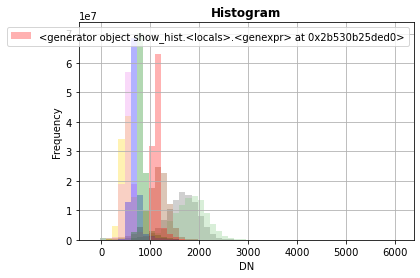

In [15]:
with rasterio.open(fail_list_toa[2]) as ds:
    show_hist(ds, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

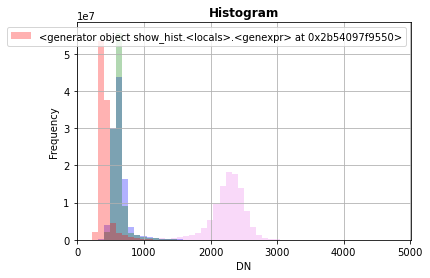

In [26]:
with rasterio.open(fail_list_srlite[2]) as ds:
    show_hist(ds, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")